In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import matchY,measures_calculator
import api
imp.reload(api)

import hdbscan
from QuickshiftPP import *
from Spectacl import Spectacl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import time
from sklearn.datasets import make_blobs
from tqdm import tqdm

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# change n

In [62]:
change_n_GIT=[]
# N = [1000*i for i in range(10,110,10)]
N = [1e3,5e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,1e6]
for n in tqdm(N):
    n = int(n)
    np.random.seed(2021)
    X,Y=make_blobs(n,10)
    t1 = time.time()
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=50,
              target_ratio=[ 1.,  1],
              plot=False,
             )
    t2 = time.time()
    change_n_GIT.append(t2-t1)
print(change_n_GIT)

100%|██████████| 21/21 [1:11:33<00:00, 204.44s/it]

[0.25248193740844727, 0.4968116283416748, 1.2382967472076416, 3.183230400085449, 5.471656799316406, 6.738407611846924, 9.924813985824585, 12.64589548110962, 15.306102514266968, 19.728278160095215, 23.925856828689575, 27.50609040260315, 75.98938179016113, 122.79522943496704, 194.64457964897156, 277.22682666778564, 375.3172450065613, 492.77396869659424, 672.8969850540161, 851.0914676189423, 1100.4896767139435]


In [39]:
change_n_GIT=[]
# N = [1000*i for i in range(10,110,10)]
N = [1e3,5e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,1e6]
for n in tqdm(N):
    n = int(n)
    np.random.seed(2021)
    X,Y=make_blobs(n,10)
    t1 = time.time()
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=20,
              target_ratio=[ 1.,  1],
              plot=False,
             )
    t2 = time.time()
    change_n_GIT.append(t2-t1)

100%|██████████| 21/21 [1:14:09<00:00, 211.90s/it]


In [40]:
print(change_n_GIT)

[0.3041713237762451, 0.5723557472229004, 1.2243072986602783, 2.7124438285827637, 4.648521900177002, 7.434204816818237, 8.762118816375732, 11.102575302124023, 12.889037370681763, 16.577032804489136, 19.57599139213562, 26.22054362297058, 59.57046175003052, 123.82636785507202, 158.18318390846252, 304.9730784893036, 429.82707834243774, 543.2400810718536, 796.1605615615845, 856.0471947193146, 1062.5866038799286]


# change d

In [41]:
change_d_GIT=[]
D = [10,50,100,300,600,1000]
for d in tqdm(D):
    np.random.seed(2021)
    X,Y=make_blobs(10000,d)
    t1 = time.time()
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=10,
              target_ratio=[ 1.,  1],
              plot=False,
             )
    t2 = time.time()
    change_d_GIT.append(t2-t1)

100%|██████████| 6/6 [00:44<00:00,  7.37s/it]


In [42]:
print(change_d_GIT)

[1.562931776046753, 2.542754650115967, 3.6594746112823486, 7.4064154624938965, 11.702874660491943, 16.431899309158325]


# change k

In [43]:
change_k_GIT=[]
K = [10,20,30,40,50,60,70,80,90,100]
for k in tqdm(K):
    np.random.seed(2021)
    X,Y=make_blobs(10000,10)
    t1 = time.time()
    Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=k,
              target_ratio=[ 1.,  1],
              plot=False,
             )
    t2 = time.time()
    change_k_GIT.append(t2-t1)

100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


In [44]:
print(change_k_GIT)

[1.3746514320373535, 1.133885145187378, 1.3109111785888672, 1.2433900833129883, 1.301696538925171, 1.3992154598236084, 1.639211893081665, 1.2862088680267334, 1.3444147109985352, 1.1638333797454834]


In [11]:
change_n_GIT/(N*np.log(N))

array([6.37447440e-09, 3.15597128e-10, 1.44324173e-10, 6.91392146e-11,
       4.86007847e-11, 4.13788685e-11, 2.99386633e-11, 2.54782775e-11,
       2.11343009e-11, 2.03214979e-11, 1.85717507e-11, 1.97820049e-11,
       9.99583490e-12, 8.65036706e-12, 5.94173724e-12, 7.08430704e-12,
       6.74500199e-12, 6.12041327e-12, 6.73333934e-12, 5.62248459e-12,
       5.56711840e-12])

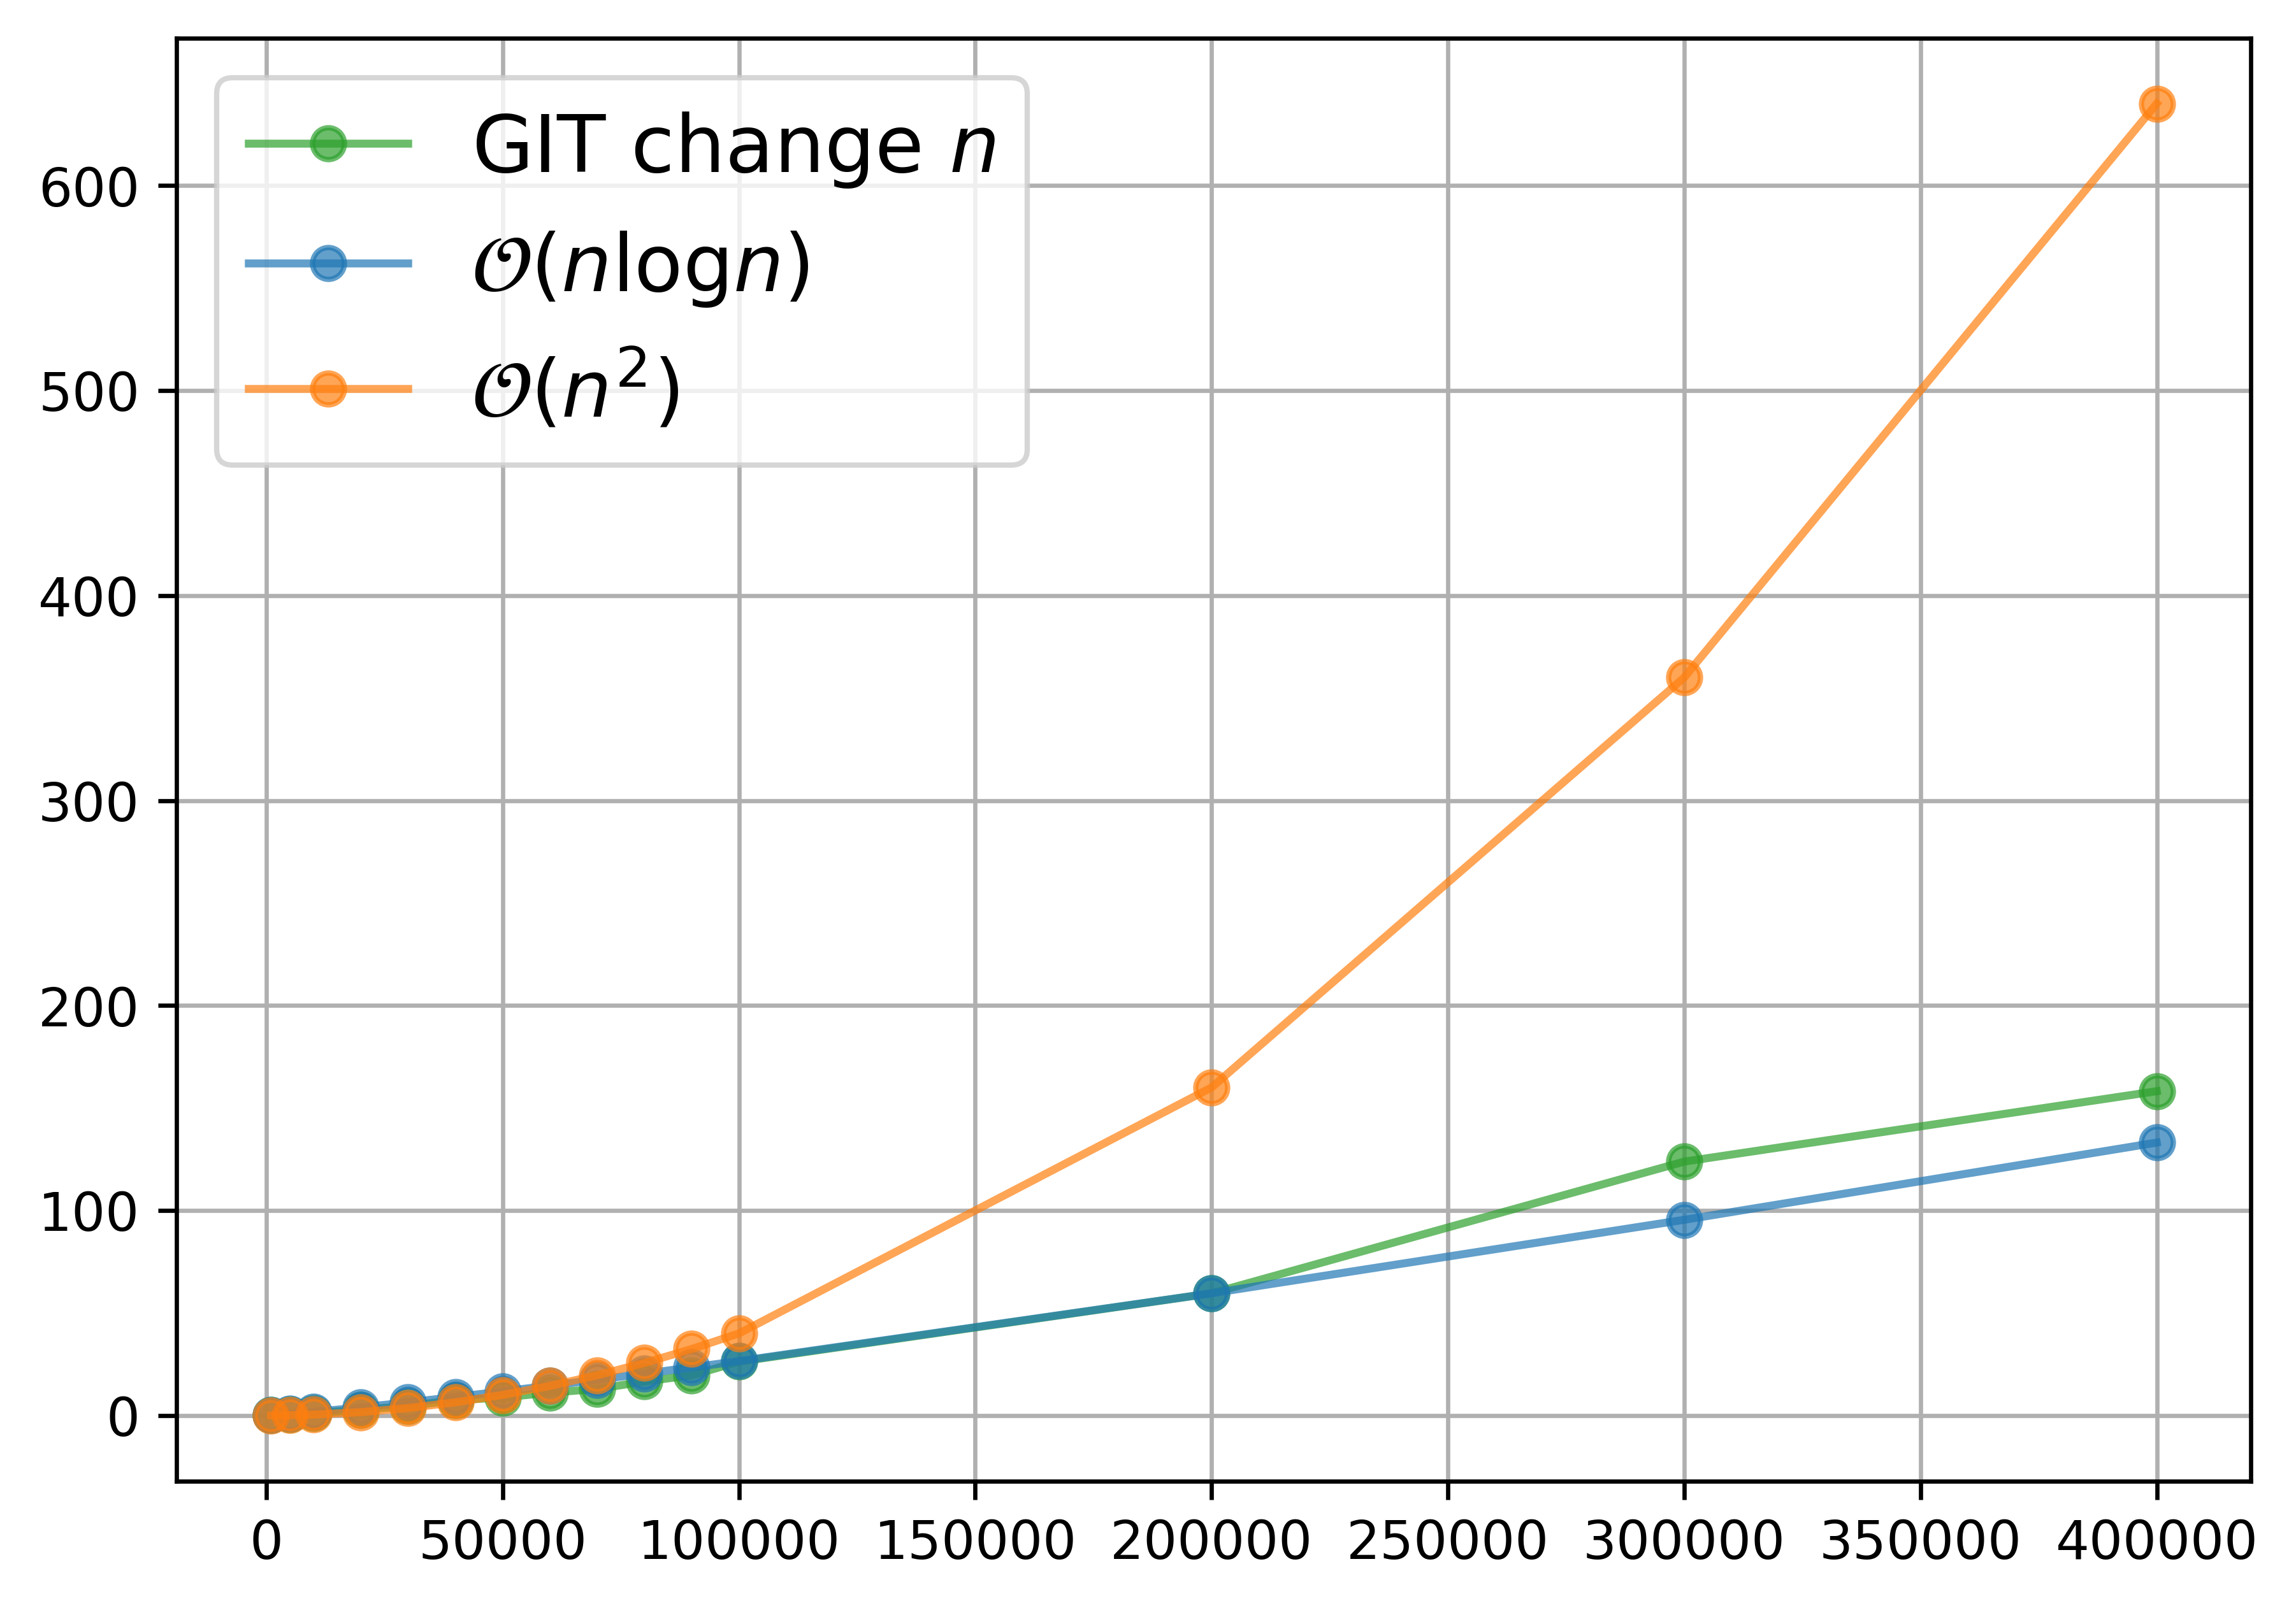

In [126]:
N = [1e3,5e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,1e6]
change_n_GIT = [0.3041713237762451, 0.5723557472229004, 1.2243072986602783, 2.7124438285827637, 4.648521900177002, 7.434204816818237, 8.762118816375732, 11.102575302124023, 12.889037370681763, 16.577032804489136, 19.57599139213562, 26.22054362297058, 59.57046175003052, 123.82636785507202, 158.18318390846252, 304.9730784893036, 429.82707834243774, 543.2400810718536, 796.1605615615845, 856.0471947193146, 1062.5866038799286]

N = np.array(N)
change_n_GIT = np.array(change_n_GIT)

plt.figure(figsize=(7,5),dpi=600)
plt.plot(N[:15],change_n_GIT[:15],marker='o',c='C2',label='GIT change $n$',alpha=0.7)
plt.plot(N[:15],(2e-6*N*np.log(N)**2)[:15],marker='o',c='C0',label='$\mathcal{O}(n \log{n})$',alpha=0.7)
plt.plot(N[:15],(4e-9*N*N)[:15],marker='o',c='C1',label='$\mathcal{O}(n^2)$',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.grid(True)
plt.savefig('time_change_n.png',bbox_inches = 'tight')

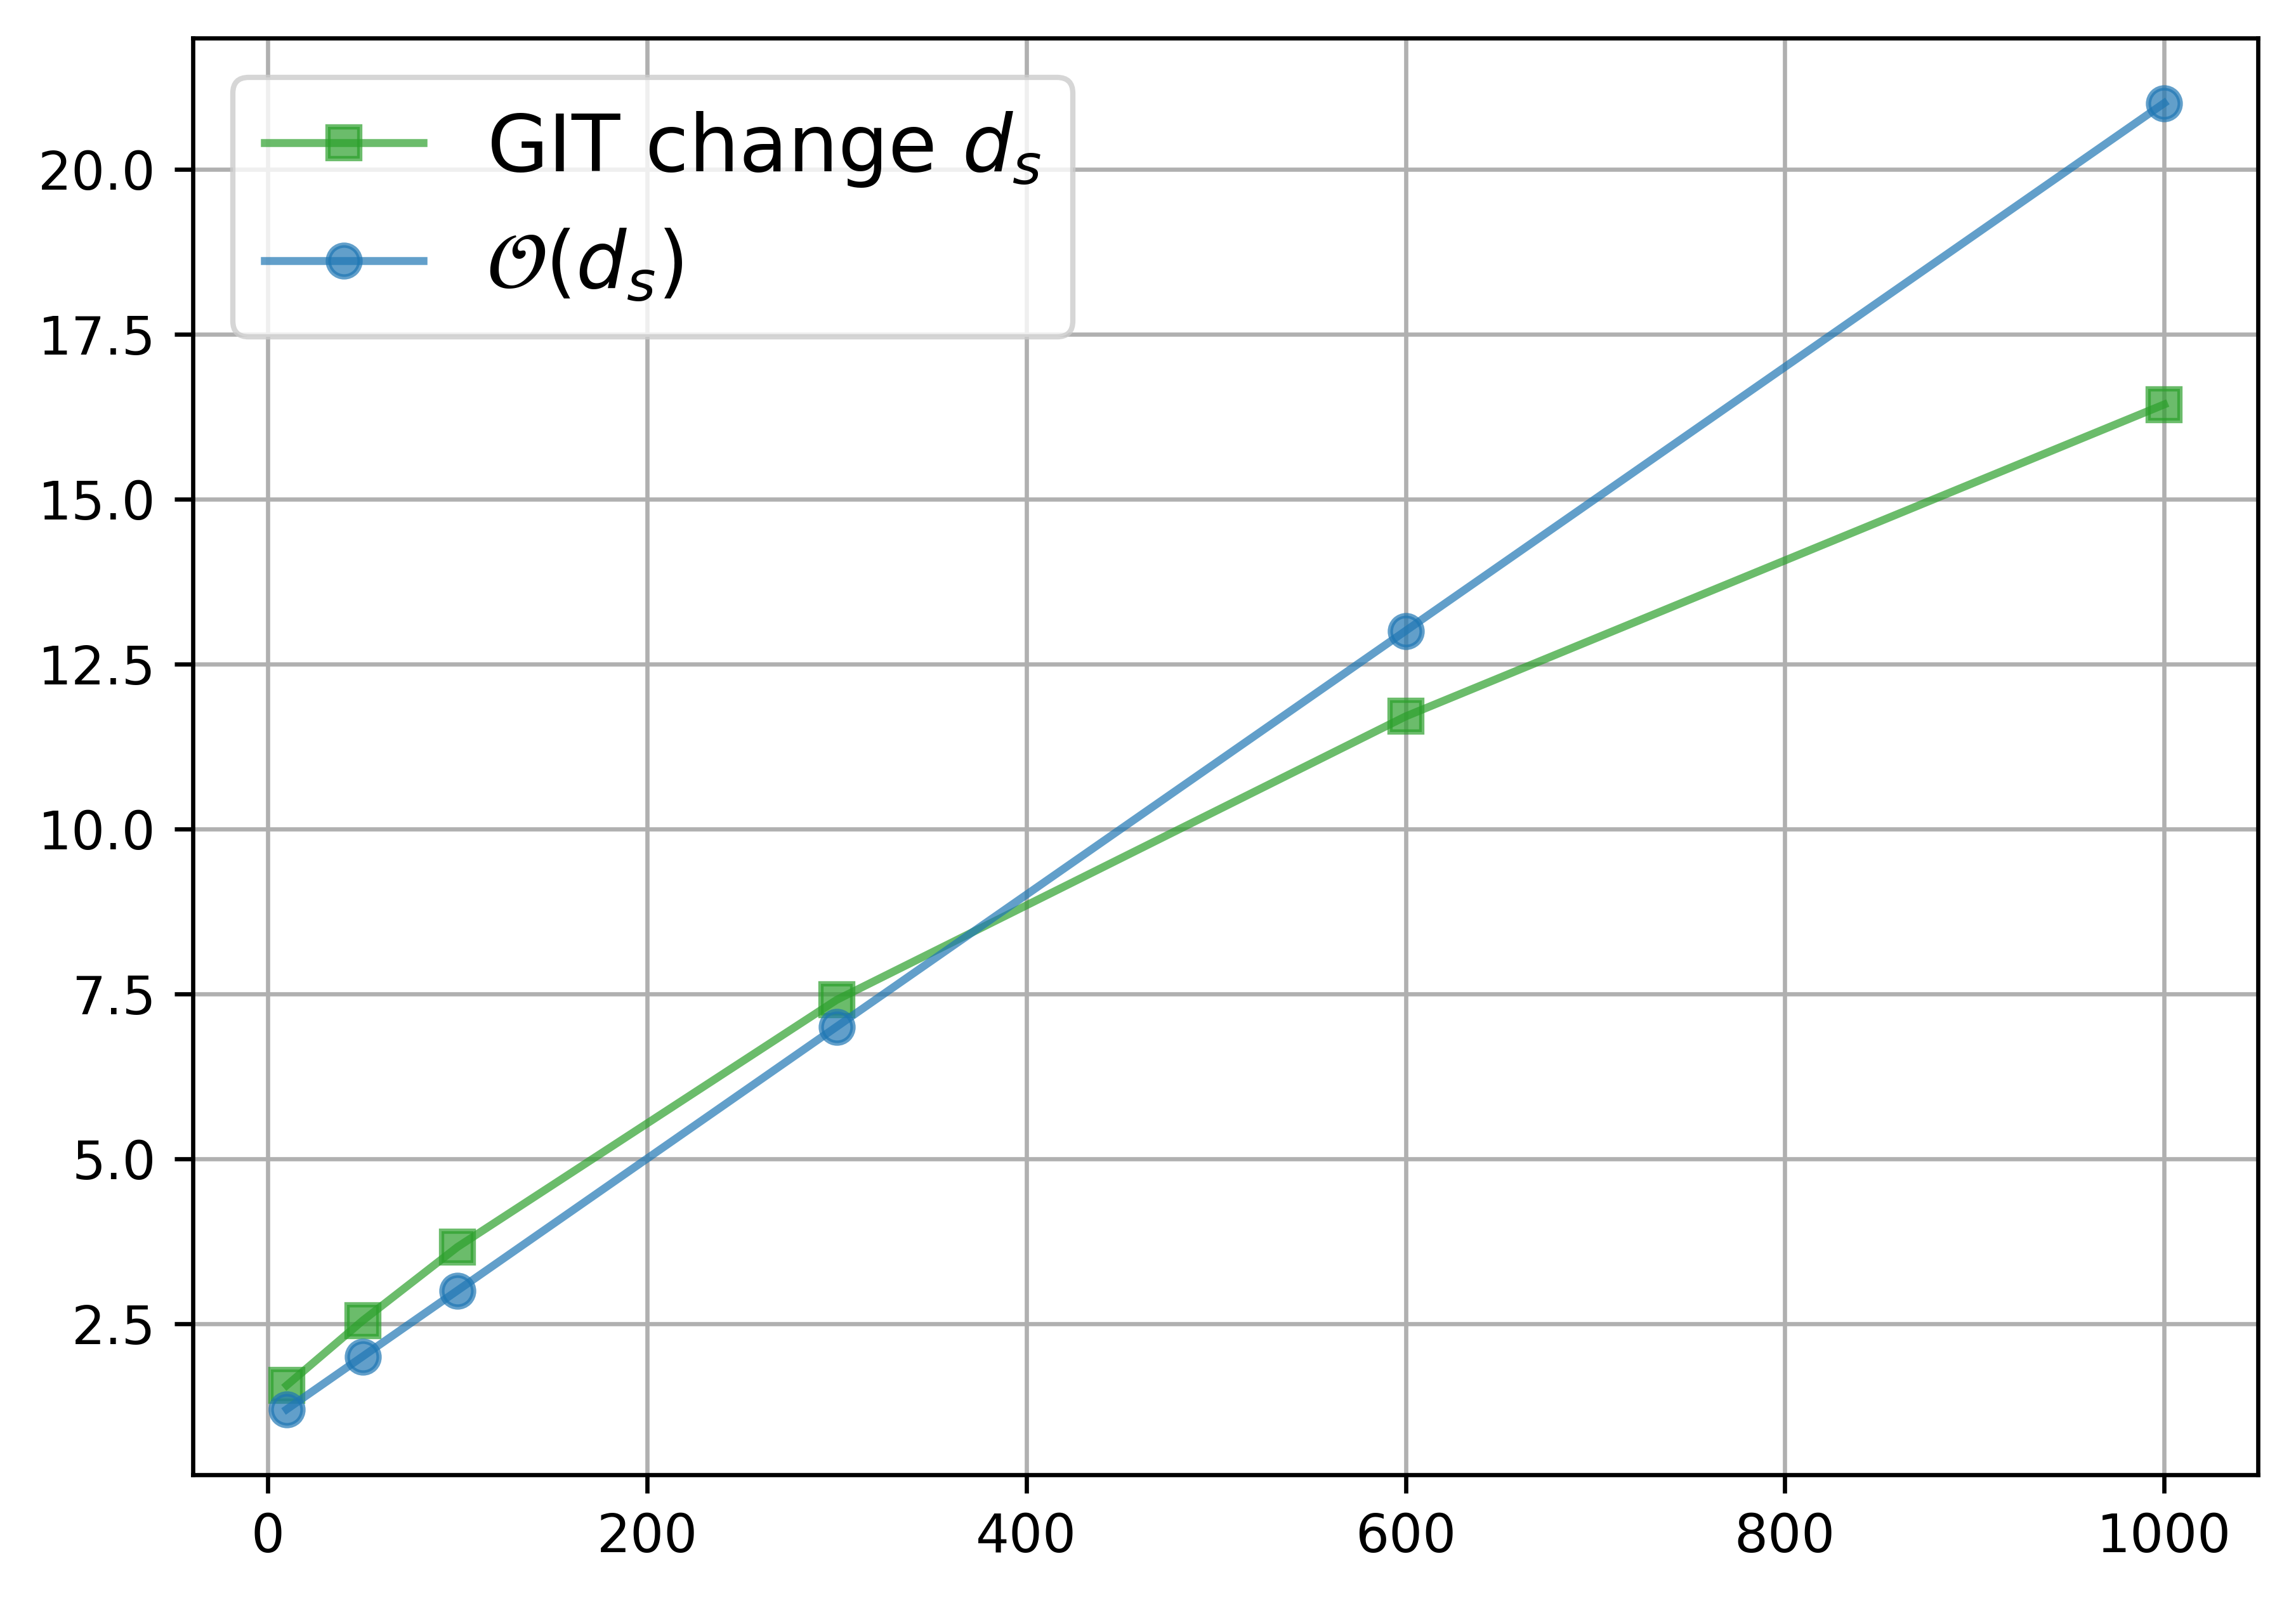

In [127]:
D = [10,50,100,300,600,1000]
D = np.array(D)
change_d_GIT = [1.562931776046753, 2.542754650115967, 3.6594746112823486, 7.4064154624938965, 11.702874660491943, 16.431899309158325]
change_d_GIT = np.array(change_d_GIT)
plt.figure(figsize=(7,5),dpi=600)
plt.plot(D,change_d_GIT,marker='s',c='C2',label='GIT change $d_s$',alpha=0.7)
plt.plot(D,0.02*D+1,marker='o',c='C0',label='$\mathcal{O}(d_s)$',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.grid(True)
plt.savefig('time_change_d.png',bbox_inches = 'tight')

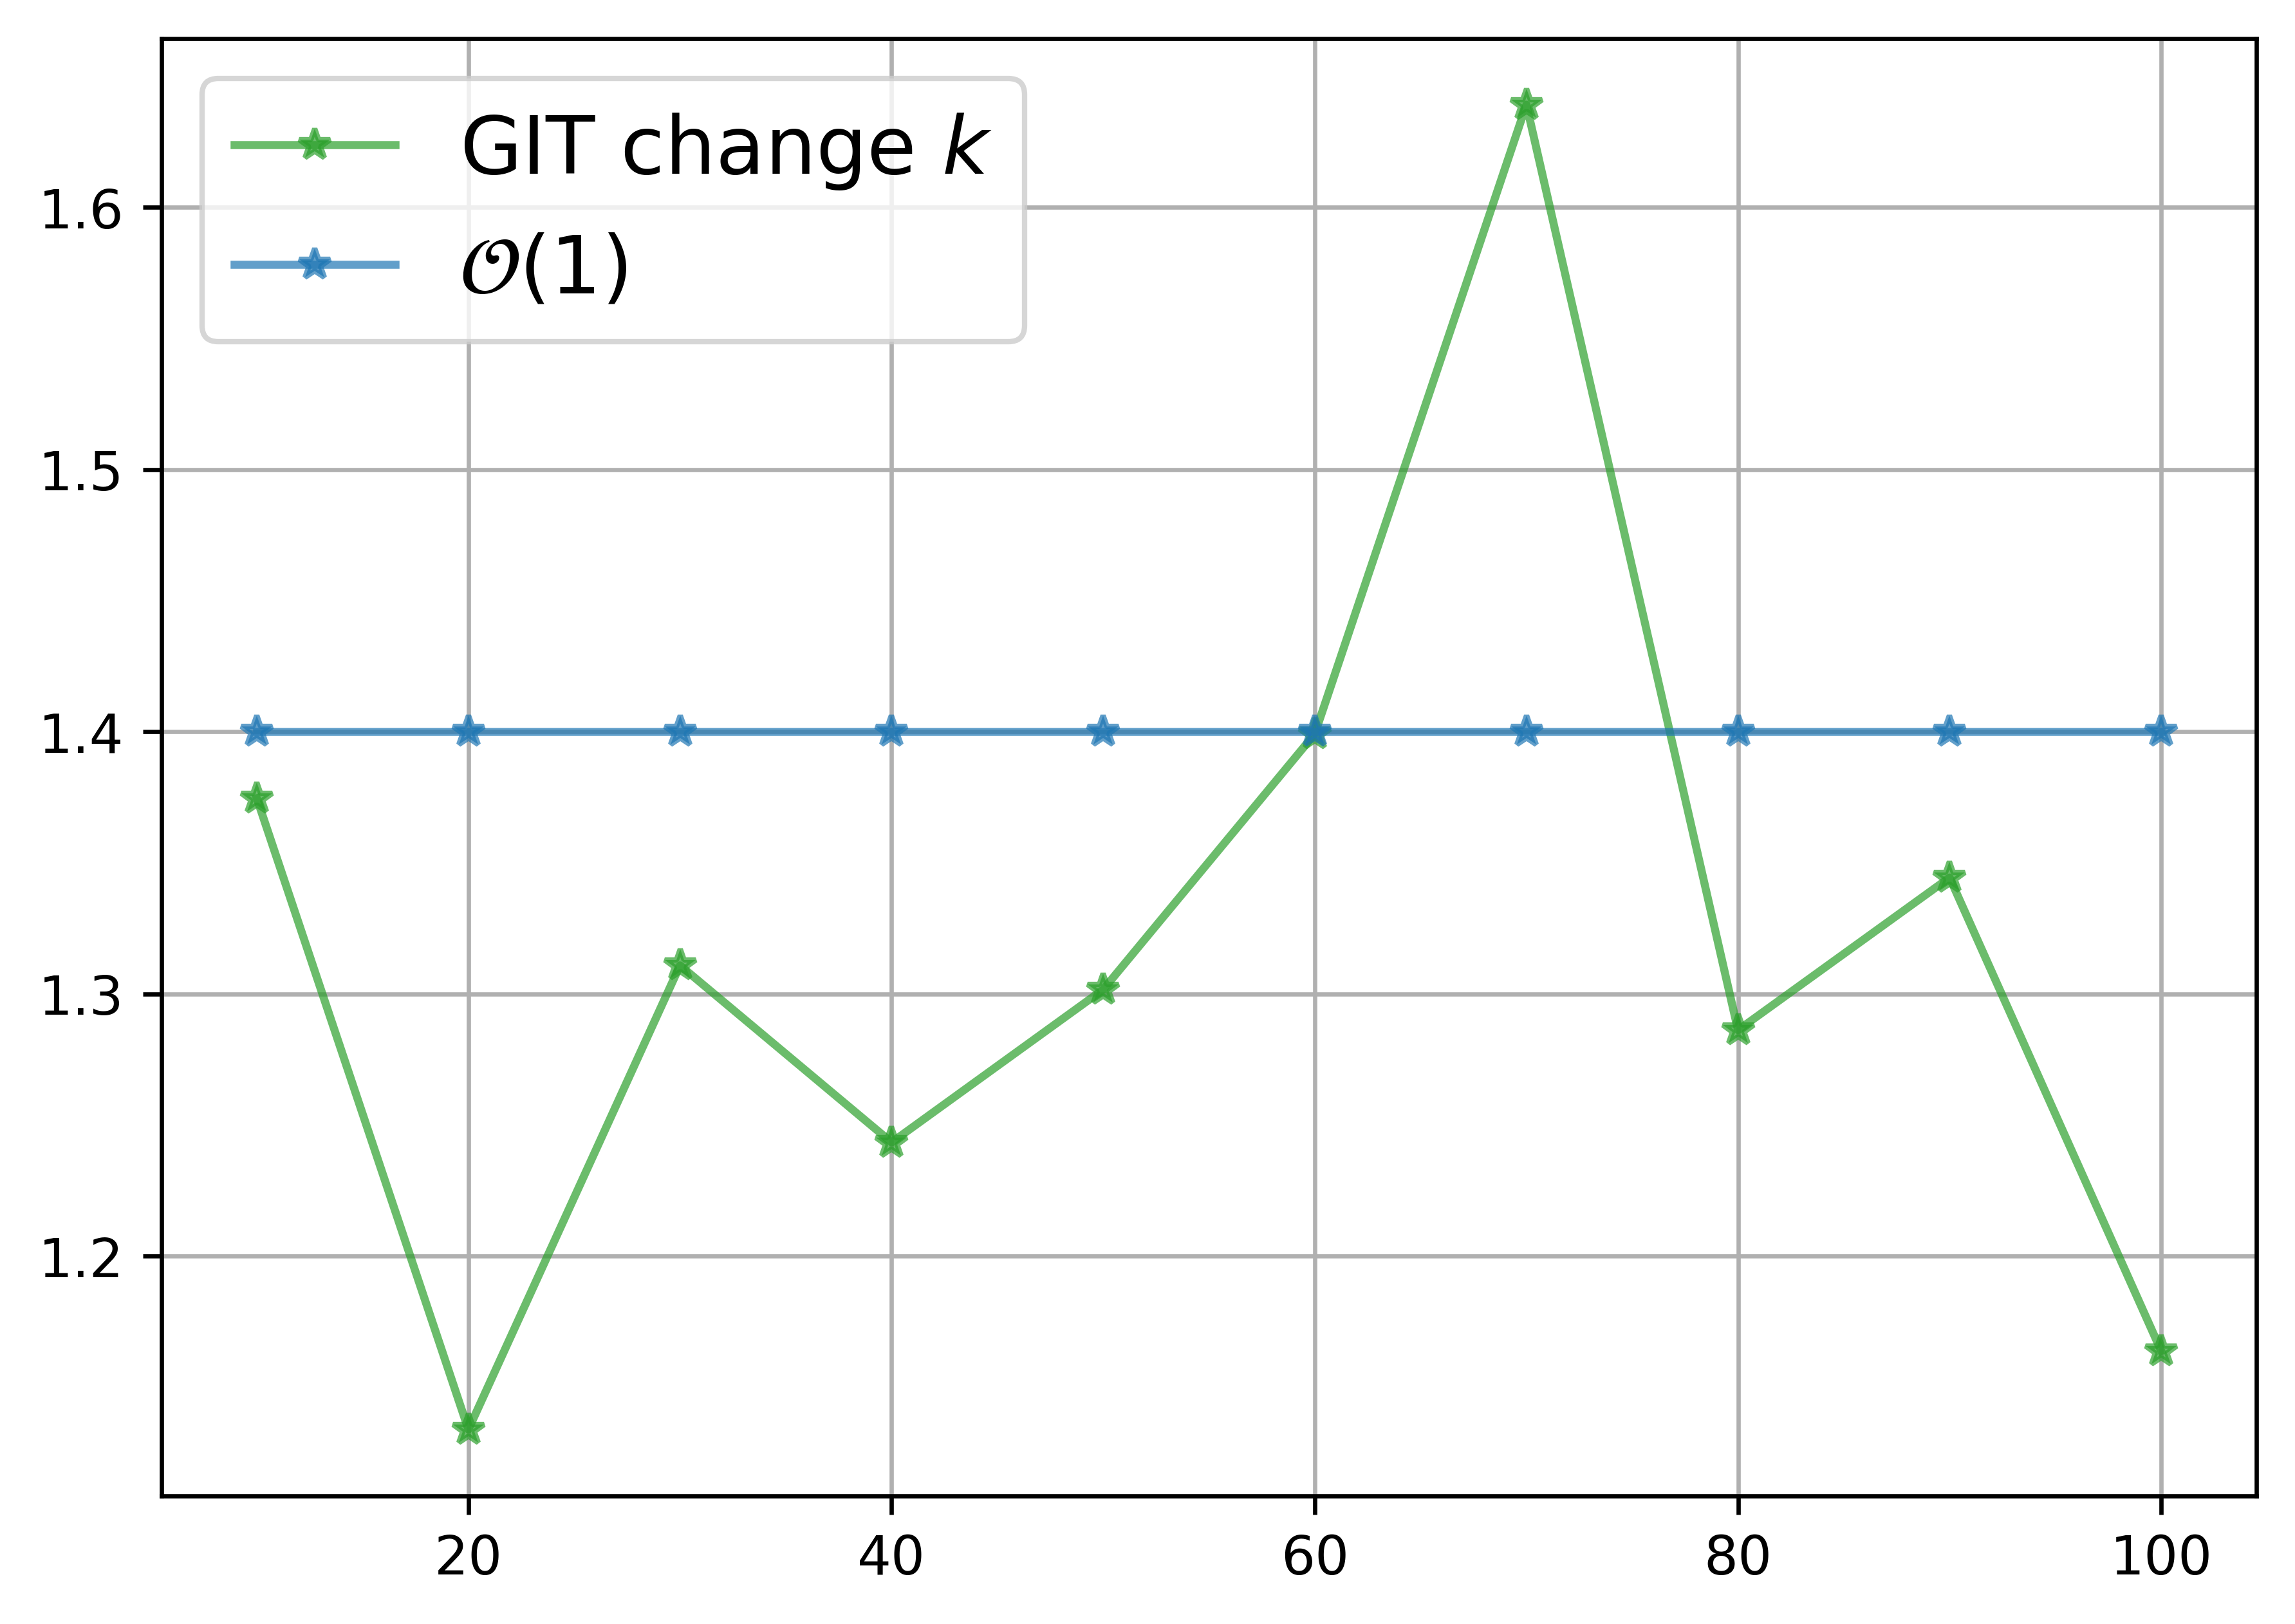

In [128]:
K = [10,20,30,40,50,60,70,80,90,100]
change_k_GIT = [1.3746514320373535, 1.133885145187378, 1.3109111785888672, 1.2433900833129883, 1.301696538925171, 1.3992154598236084, 1.639211893081665, 1.2862088680267334, 1.3444147109985352, 1.1638333797454834]

plt.figure(figsize=(7,5),dpi=600)
plt.plot(K,change_k_GIT,marker='*',c='C2',label='GIT change $k$',alpha=0.7)
plt.plot(K,np.ones(len(K))*1.4,marker='*',c='C0',label='$\mathcal{O}(1)$',alpha=0.7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=15,loc='upper left')
plt.grid(True)
plt.savefig('time_change_k.png',bbox_inches = 'tight')